In [80]:
from tensorflow.keras.datasets import imdb
import numpy as np

In [81]:
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

In [82]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [83]:
train_data.shape

(25000,)

In [84]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [85]:
word_index=imdb.get_word_index()

In [86]:
reversed_word_index=dict((value,key) for (key,value) in word_index.items())

In [87]:
decoded_review=" ".join(reversed_word_index.get(i-3,'?') for i in train_data[0])

In [88]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

# Prepare_data

In [89]:
def Bag_of_words(sequence,dimension=10000):
    result=np.zeros((len(sequence),dimension))
    for i,j in enumerate(sequence):
        result[i,j]=1
    return result

In [90]:
train_data=Bag_of_words(train_data)
test_data=Bag_of_words(test_data)

In [91]:
train_data[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [92]:
train_data.shape

(25000, 10000)

In [93]:
test_data.shape

(25000, 10000)

# Build_model

In [94]:
from tensorflow.keras import models,layers

In [95]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [96]:
model.compile(optimizer='Adam',loss='binary_crossentropy',
              metrics=['accuracy'])

In [66]:
model.fit(train_data,train_labels,epochs=5,batch_size=128)

Epoch 1/5
196/196 [==============================] - 2s 10ms/step - loss: 0.1342 - accuracy: 0.9483
Epoch 2/5
196/196 [==============================] - 2s 8ms/step - loss: 0.0882 - accuracy: 0.9703
Epoch 3/5
196/196 [==============================] - 2s 8ms/step - loss: 0.0441 - accuracy: 0.9876
Epoch 4/5
196/196 [==============================] - 2s 8ms/step - loss: 0.0159 - accuracy: 0.9965
Epoch 5/5
196/196 [==============================] - 2s 8ms/step - loss: 0.0044 - accuracy: 0.9992


In [97]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [98]:
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 62ms/step - loss: 0.4576 - accuracy: 0.8091 - val_loss: 0.2906 - val_accuracy: 0.8842
Epoch 2/20
30/30 [==============================] - 1s 49ms/step - loss: 0.1966 - accuracy: 0.9262 - val_loss: 0.2902 - val_accuracy: 0.8842
Epoch 3/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1153 - accuracy: 0.9620 - val_loss: 0.3344 - val_accuracy: 0.8798
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0689 - accuracy: 0.9804 - val_loss: 0.3892 - val_accuracy: 0.8759
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0387 - accuracy: 0.9915 - val_loss: 0.4599 - val_accuracy: 0.8715
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0194 - accuracy: 0.9977 - val_loss: 0.5261 - val_accuracy: 0.8714
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0094 - accuracy: 0.9996 - val_loss: 0.5799 - val_accuracy: 0.8725
Epoch 8/20
30

In [99]:
history_dict=history.history

In [100]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Early_stopping

In [101]:
import matplotlib.pyplot as plt

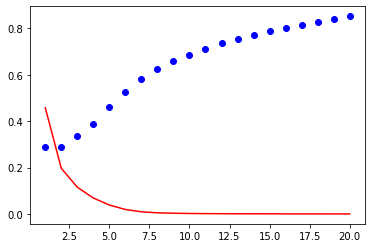

In [102]:
acc=history_dict['accuracy']
epochs=np.arange(1,len(acc)+1)
loss=history_dict['loss']
val_loss=history_dict['val_loss']
plt.plot(epochs,loss,'r-')
plt.plot(epochs,val_loss,'bo')

# New model with only 3 epochs

In [105]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
print(model.summary())
model.fit(train_data, train_labels, epochs=3, batch_size=512)
#results = model.evaluate(train_labels,test_labels)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                160016    
                                                                 
 dense_13 (Dense)            (None, 16)                272       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
49/49 [==============================] - 1s 13ms/step - loss: 0.4816 - accuracy: 0.8149
Epoch 2/3
49/49 [==============================] - 1s 14ms/step - loss: 0.2449 - accuracy: 0.9120
Epoch 3/3
49/49 [==============================] - 1s 12ms/step - loss: 0.1766 - accuracy: 0.9379


In [106]:
test_data.shape

(25000, 10000)

In [107]:
test_labels

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [110]:
results = model.evaluate(test_data,test_labels)

782/782 [==============================] - 2s 2ms/step - loss: 0.2909 - accuracy: 0.8854
